In [2]:
import numpy as np
from scipy import interpolate
import logging
logger = logging.getLogger(name="pypsa")
logger.setLevel("WARNING") # silence logger

# my imports
from n_dimensional_datasets import *
from plotter import *
from scoring import *

# 3rd party
import pypsa

In [3]:
loads = stochastic_mesh(2, 0, 1, 1000)

In [4]:
network = pypsa.Network()

network.set_snapshots(range(loads.shape[1]))

#add three buses
n_buses = 3


network.add("Bus","My bus 0", v_nom=20.)
network.add("Bus","My bus 1", v_nom=20.)
network.add("Bus","My bus 2", v_nom=20.)
    

#add lines
network.add("Line", "My line 01", bus0="My bus 0", bus1="My bus 1", x=0.01, r=0.1, s_nom=1)
network.add("Line", "My line 02", bus0="My bus 0", bus1="My bus 2", x=0.01, r=0.1, s_nom=1)
network.add("Line", "My line 12", bus0="My bus 1", bus1="My bus 2", x=0.01, r=0.1, s_nom=1)


#add a generator at bus 0
network.add("Generator","My gen 0", bus="My bus 0", p_nom=2, marginal_cost=1)
network.add("Generator","My gen 1", bus="My bus 1", p_nom=0.25, marginal_cost=1)


#add loads
network.add("Load", "My load 1", bus="My bus 1", p_set=loads[0])
network.add("Load", "My load 2", bus="My bus 2", p_set=loads[1])

In [5]:
#Do a Newton-Raphson power flow
network.lopf()

('ok', 'optimal')

In [6]:
phases = network.buses_t.v_ang.values.T*180/np.pi

In [7]:
loads.T
print(loads.T.shape)

(1000, 2)


In [7]:
interp = interpolate.LinearNDInterpolator(loads.T, list(zip(phases[0], phases[1], phases[2])))

score:  0.0005151886258876442


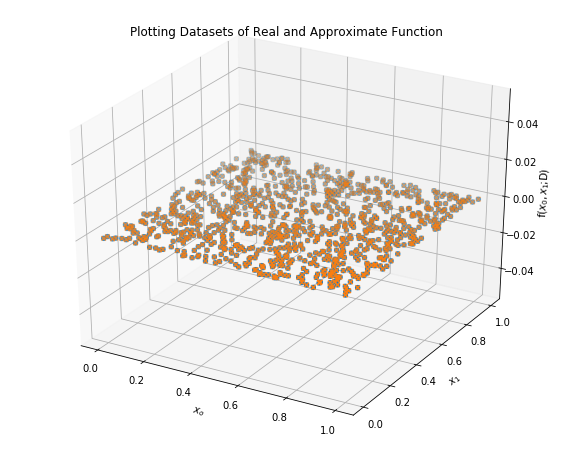

score:  0.0003591840599750391


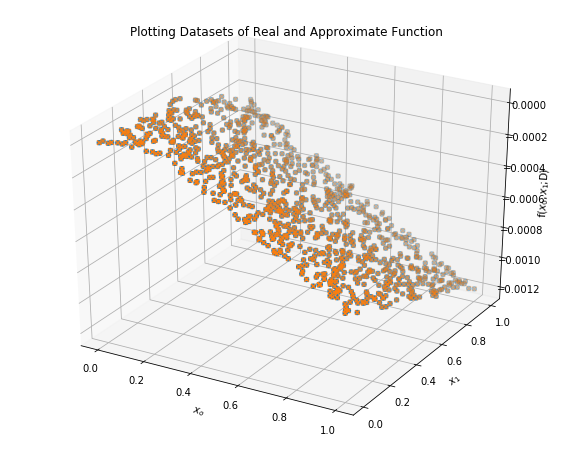

score:  0.00041256826421266936


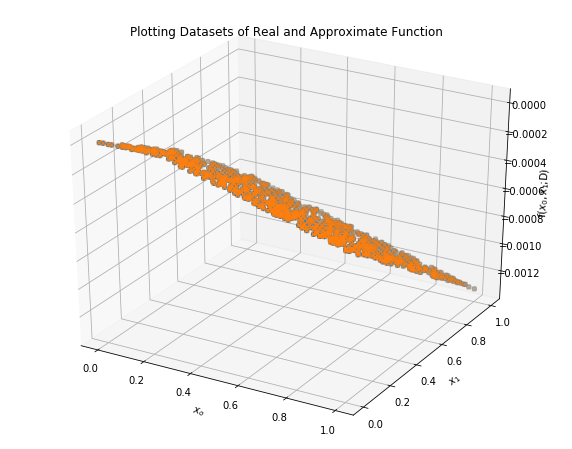

In [11]:
for i, phase in enumerate(phases):
    score = rmse(phase, interp(loads.T))
    print("score: ", score)
    plot3d_approximation(loads, phase, interp(loads.T).T[i])